In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [54]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


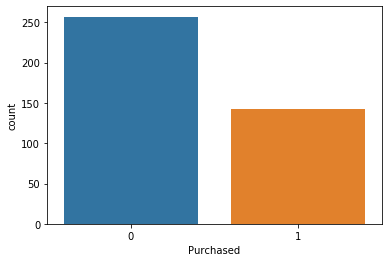

In [55]:
sns.countplot(x='Purchased',data=data)

In [56]:
data = pd.get_dummies(data, dummy_na=True)

In [57]:
data = data.drop('User ID',axis=1)

In [58]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male,Gender_nan
0,19,19000,0,0,1,0
1,35,20000,0,0,1,0
2,26,43000,0,1,0,0
3,27,57000,0,1,0,0
4,19,76000,0,0,1,0


In [59]:
data = data.drop('Gender_nan',axis=1)

In [91]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


# dividing the data

In [61]:
X = data.drop('Purchased', axis=1).values
y = data['Purchased'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# KNN Model

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
y_pred = knn.predict(X_test)

In [65]:
confusion_matrix(y_test, y_pred)

array([[69,  4],
       [18, 29]], dtype=int64)

In [69]:
accuracy = metrics.accuracy_score(y_pred, y_test)
accuracy

0.8166666666666667